In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [55]:
# Read the data
seasons = list(range(2011, 2019))
season_val_dict = {season:pd.read_csv(f'season_val/{season}.csv') 
                   for season in seasons}
season_scraped_dict = {season:pd.read_csv(f'season_scraped/{season}.csv') 
                       for season in seasons}

In [56]:
# Prepare Data
def prepare_data(dict_, team_col):
    for season in dict_.keys():
        temp = dict_[season]
        temp['Season'] = season
        temp['Season_Tm'] = temp['Season'].apply(str)\
                                          .str.cat(temp[team_col], 
                                                   sep=' ')
        dict_[season] = temp
    return pd.concat([dict_[season] for season in dict_.keys()])

val_11_18 = prepare_data(season_val_dict, 'Tm')
scraped_11_18 = prepare_data(season_scraped_dict, 'Team')
print(f"Games in this dataset: {int(scraped_11_18.shape[0] / 9)}")

Games in this dataset: 38876


## Functions

In [4]:
def get_season_info(dict_, year, option):
    target_list = ["PA", "is_OB", "is_ISP"]
    temp = dict_[year]
    if option == 'sum':
        temp_order = temp.groupby(by='Batting_Order')[target_list]\
                         .sum().reset_index()
    elif option == 'mean':
        temp_order = temp.groupby(by='Batting_Order')[target_list]\
                         .mean().reset_index()
    else:
        raise ValueError('Either sum or mean')
    temp_order['OB%'] = temp_order['is_OB'] / temp_order['PA']
    temp_order['RISP%'] = temp_order['is_ISP'] / temp_order['PA']
    return temp_order.rename(columns={col: f'{col}_{option}'
                                      for col in target_list})

In [5]:
def generate_trend(season_dfs, target, y_label):
    figsize(12, 8)
    for order in [order for order in range(1, 10)]:
        years = [year for year in range(2011, 2019)]
        ys = []
        for year in years:
            df = season_dfs[year]
            ys.append(df[df.Batting_Order == order][target].values[0])
        plt.xlim(2010, 2019)
        plt.plot(years, ys, label = order)
        plt.scatter(years, ys)
        plt.legend(loc='upper left')
    plt.xlabel('year', fontsize=14)
    plt.ylabel(f'{target}\n', fontsize=14)
    plt.suptitle(f'{y_label} (2011-2018)\n', fontsize=16)

## Trend 2011-2018

In [6]:
season_dfs = {season: get_season_info(season_scraped_dict, season, 'sum')
                      .drop(['OB%', 'RISP%'], axis=1)
                      .merge(get_season_info(season_scraped_dict, 
                                             season, 'mean'), how='left')
              for season in range(2011, 2019)}

### Season 2018

In [7]:
season_dfs[2018]

,Batting_Order,PA_sum,is_OB_sum,is_ISP_sum,PA_mean,is_OB_mean,is_ISP_mean,OB%,RISP%
0,1,22630,7244,4328,4.654463,1.489922,0.890169,0.320106,0.191251
1,2,22133,9098,4753,4.552242,1.871246,0.977581,0.411060,0.214747
2,3,21614,9921,5558,4.445496,2.040518,1.143151,0.459008,0.257148
3,4,21129,10340,5995,4.345742,2.126697,1.233032,0.489375,0.283733
4,5,20642,9174,5506,4.245578,1.886878,1.132456,0.444434,0.266738
5,6,20107,8731,5029,4.135541,1.795763,1.034348,0.434227,0.250112
6,7,19534,8666,4863,4.017688,1.782394,1.000206,0.443637,0.248951
7,8,18964,8363,4916,3.900452,1.720074,1.011107,0.440993,0.259228
8,9,18386,8039,4713,3.781571,1.653435,0.969354,0.437235,0.256336


### Trend 2011-2018 (Sum)

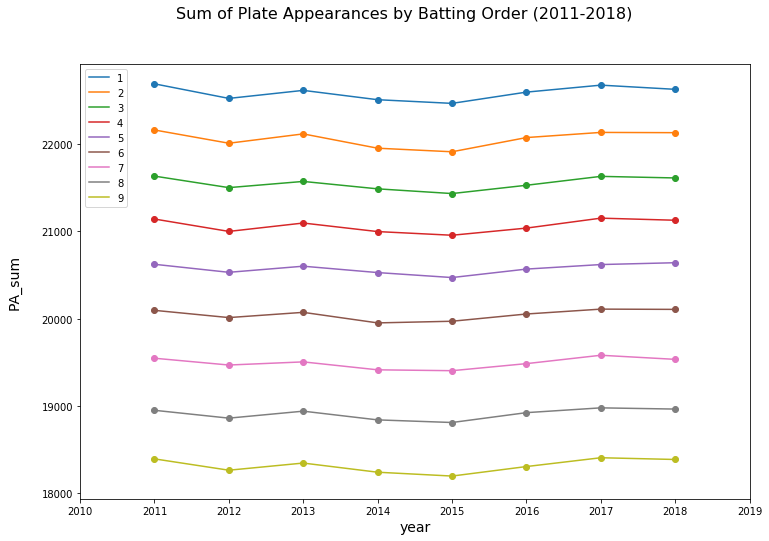

In [8]:
generate_trend(season_dfs, 'PA_sum', 
               'Sum of Plate Appearances by Batting Order')

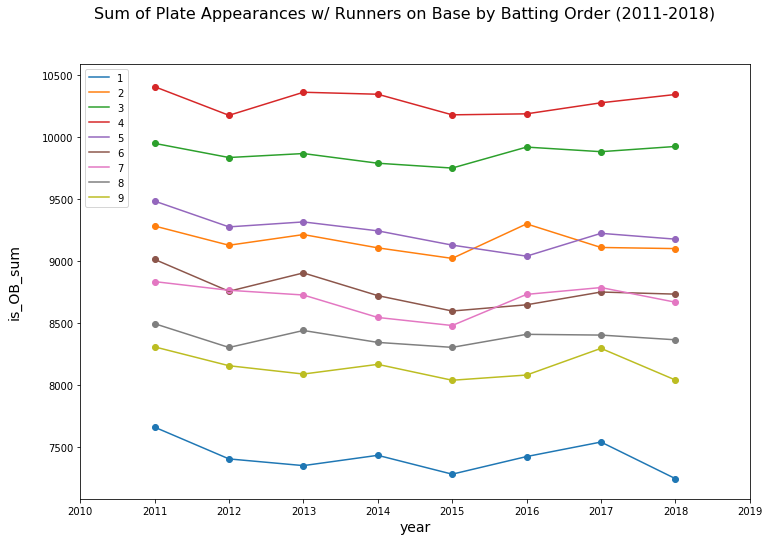

In [9]:
generate_trend(season_dfs, 'is_OB_sum', 
               'Sum of Plate Appearances w/ Runners on Base by Batting Order')

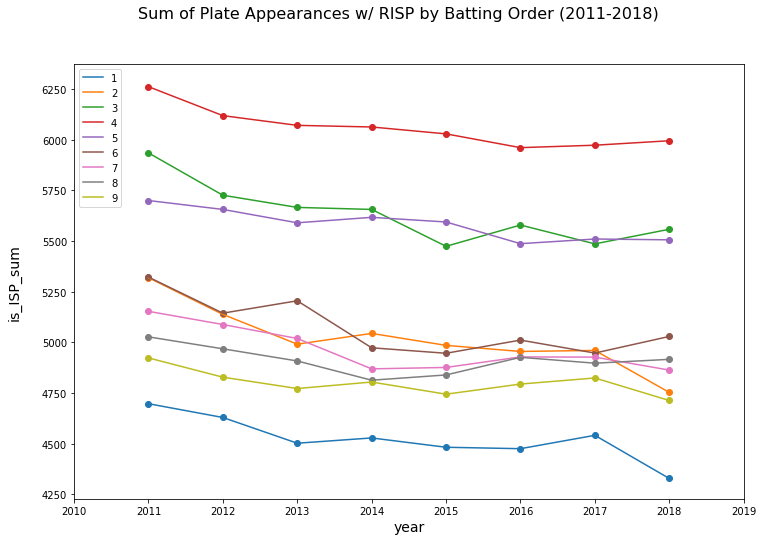

In [10]:
generate_trend(season_dfs, 'is_ISP_sum', 
               'Sum of Plate Appearances w/ RISP by Batting Order')

### Trend 2011-2018 (Mean)

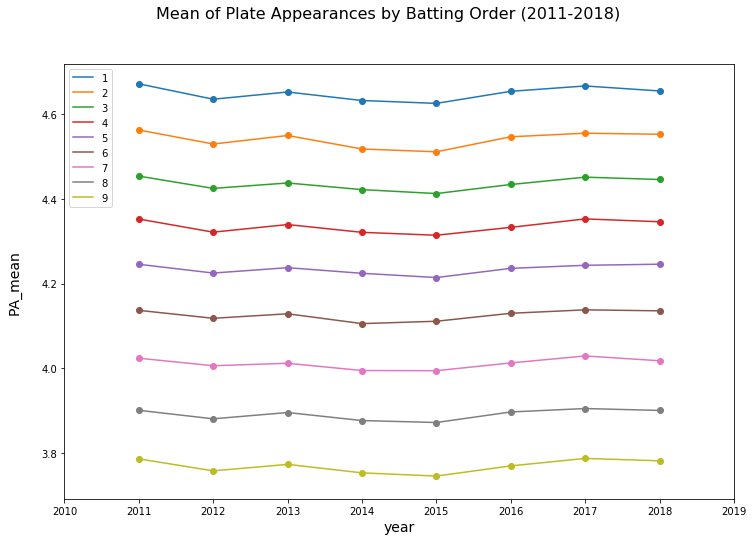

In [11]:
generate_trend(season_dfs, 'PA_mean', 
               'Mean of Plate Appearances by Batting Order')

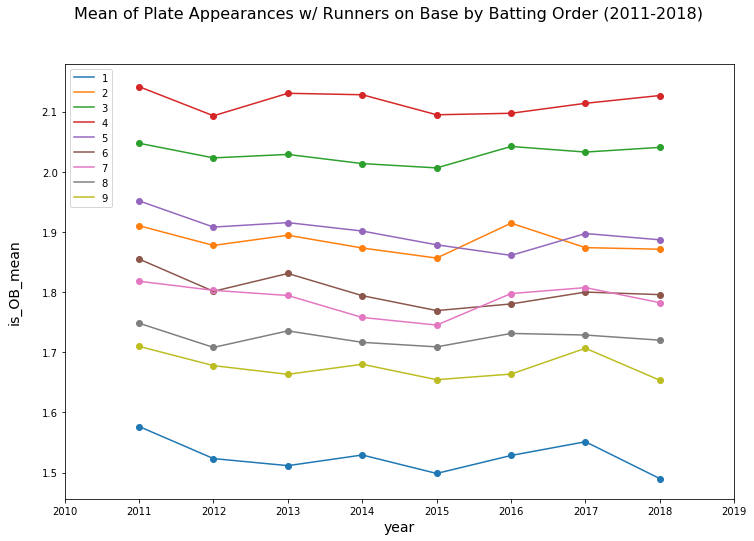

In [12]:
generate_trend(season_dfs, 'is_OB_mean', 
               'Mean of Plate Appearances w/ Runners on Base by Batting Order')

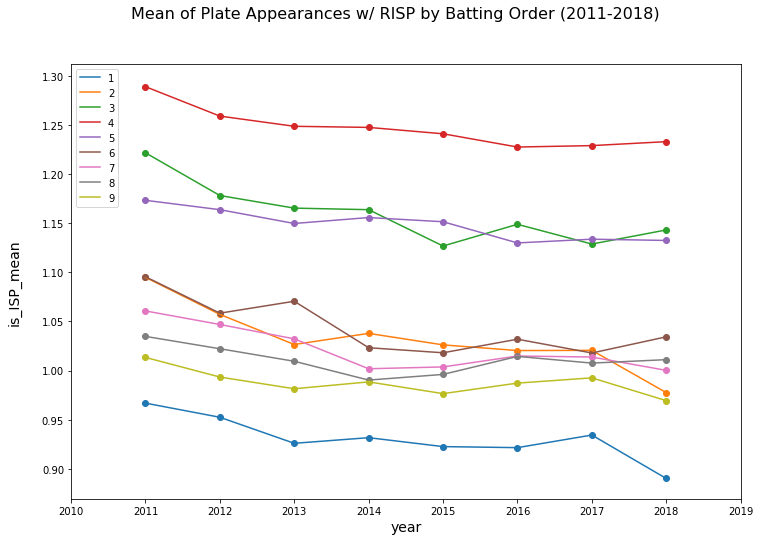

In [13]:
generate_trend(season_dfs, 'is_ISP_mean', 
               'Mean of Plate Appearances w/ RISP by Batting Order')

### Trend 2011-2018 (%)

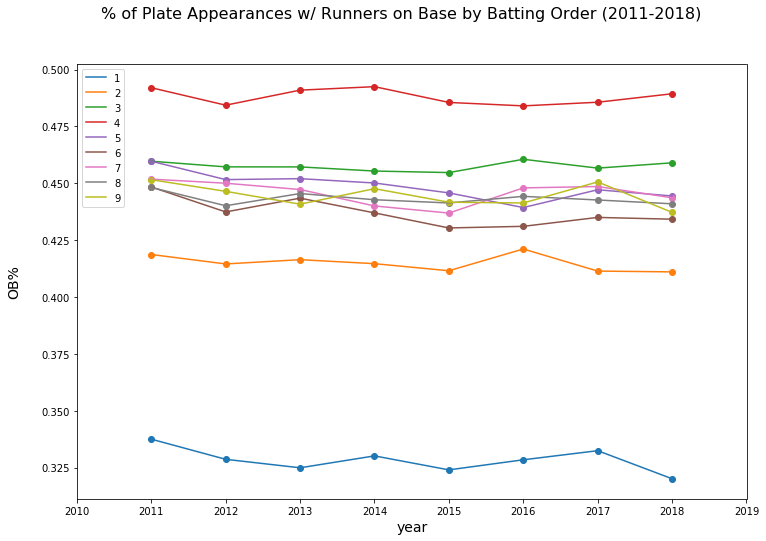

In [14]:
generate_trend(season_dfs, 'OB%', 
               '% of Plate Appearances w/ Runners on Base by Batting Order')

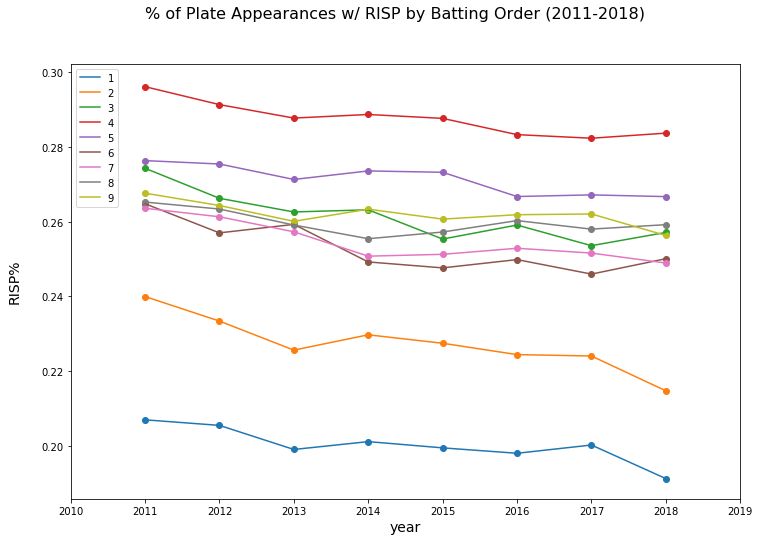

In [15]:
generate_trend(season_dfs, 'RISP%', 
               '% of Plate Appearances w/ RISP by Batting Order')

## Trend 2011-2018 (American League Only)

In [16]:
AL_dict = {}
AL_teams = ['BAL', 'BOS', 'NYY', 'TBR', 'TOR',
            'CHW', 'CLE', 'DET', 'KCR', 'MIN',
            'HOU', 'LAA', 'OAK', 'SEA', 'TEX']
for season in range(2011, 2019):
    if season >= 2013:
        AL_dict[season] = AL_teams
    else:
        AL_dict[season] = [team for team in AL_teams if team != 'HOU']

In [17]:
AL_season_scraped_dict = {}
for season in range(2011, 2019):
    teams = AL_dict[season]
    season_df = pd.concat([scraped_11_18[(scraped_11_18.Season == season) &
                                       (scraped_11_18.Team == team)] 
                         for team in teams])
    AL_season_scraped_dict[season] = season_df

In [18]:
AL_season_dfs = {season: get_season_info(AL_season_scraped_dict, season, 'sum')
                         .drop(['OB%', 'RISP%'], axis=1)
                         .merge(get_season_info(AL_season_scraped_dict, 
                                             season, 'mean'), how='left')
                 for season in range(2011, 2019)}

In [19]:
AL_scraped_11_18 = prepare_data(AL_season_scraped_dict, 'Team')
print(f"Games in this dataset: {int(AL_scraped_11_18.shape[0] / 9)}")

Games in this dataset: 19114


### Season 2018 (AL Only)

In [20]:
AL_season_dfs[2018]

,Batting_Order,PA_sum,is_OB_sum,is_ISP_sum,PA_mean,is_OB_mean,is_ISP_mean,OB%,RISP%
0,1,11297,3739,2206,4.648971,1.538683,0.907819,0.330973,0.195273
1,2,11029,4622,2482,4.538683,1.902058,1.021399,0.419077,0.225043
2,3,10758,4970,2850,4.427160,2.045267,1.172840,0.461982,0.264919
3,4,10520,5133,3030,4.329218,2.112346,1.246914,0.487928,0.288023
4,5,10280,4450,2672,4.230453,1.831276,1.099588,0.432879,0.259922
5,6,10011,4249,2426,4.119753,1.748560,0.998354,0.424433,0.242333
6,7,9737,4305,2395,4.006996,1.771605,0.985597,0.442128,0.245969
7,8,9450,4140,2389,3.888889,1.703704,0.983128,0.438095,0.252804
8,9,9172,3919,2326,3.774486,1.612757,0.957202,0.427279,0.253598


### Trend 2011-2018 (Sum) (AL Only)

In [21]:
AL = 'American League'

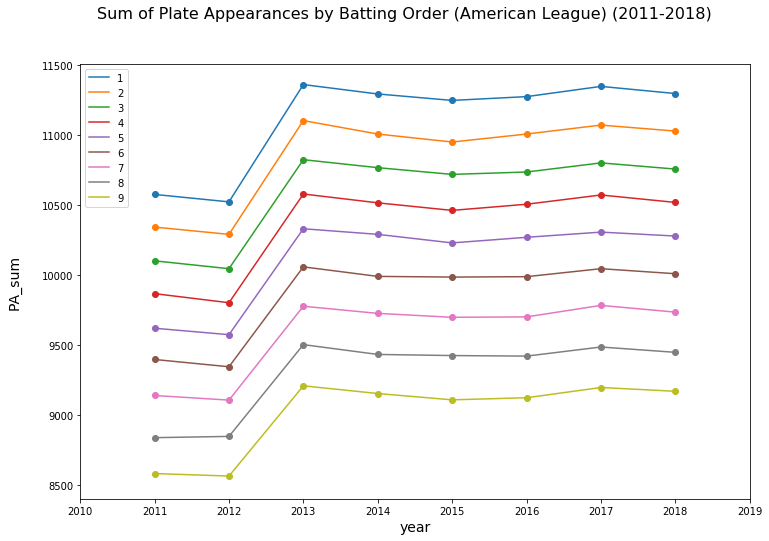

In [22]:
generate_trend(AL_season_dfs, 'PA_sum', 
               f'Sum of Plate Appearances by Batting Order ({AL})')

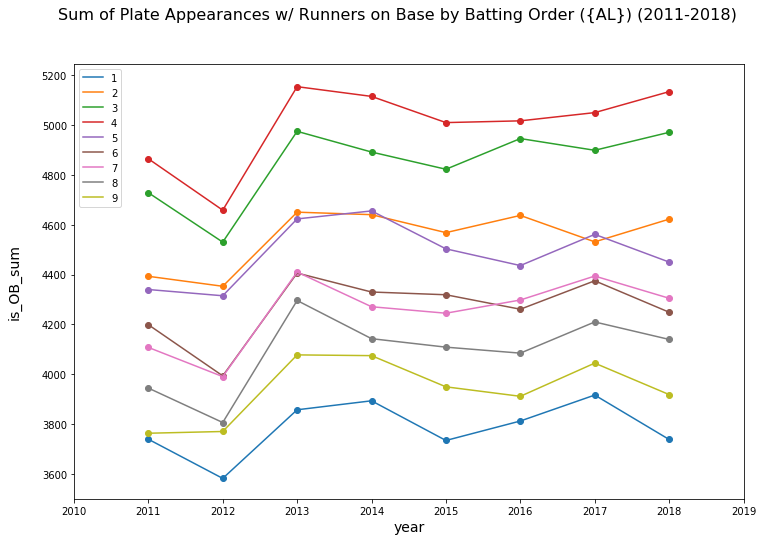

In [23]:
generate_trend(AL_season_dfs, 'is_OB_sum', 
               'Sum of Plate Appearances w/ Runners on Base by Batting Order ({AL})')

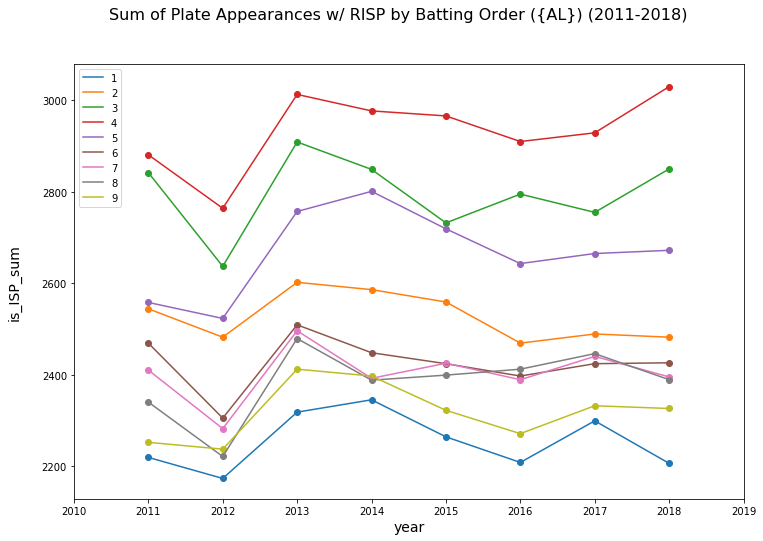

In [24]:
generate_trend(AL_season_dfs, 'is_ISP_sum', 
               'Sum of Plate Appearances w/ RISP by Batting Order ({AL})')

### Trend 2011-2018 (Mean) (AL Only)

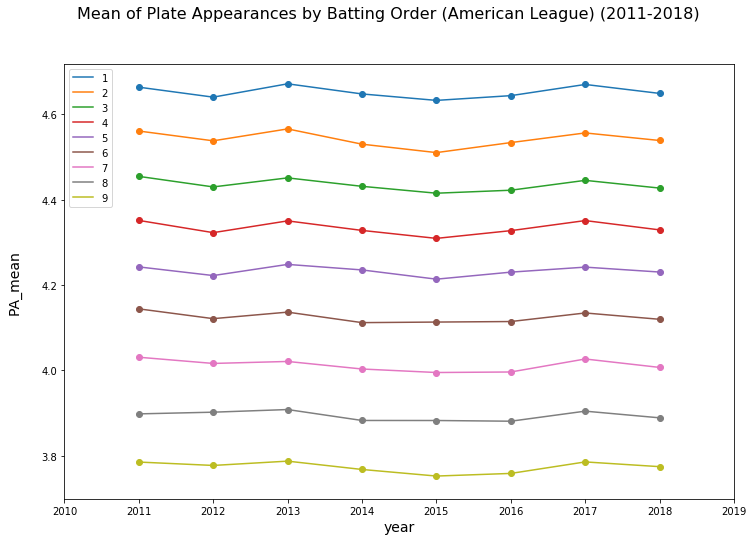

In [25]:
generate_trend(AL_season_dfs, 'PA_mean', 
               f'Mean of Plate Appearances by Batting Order ({AL})')

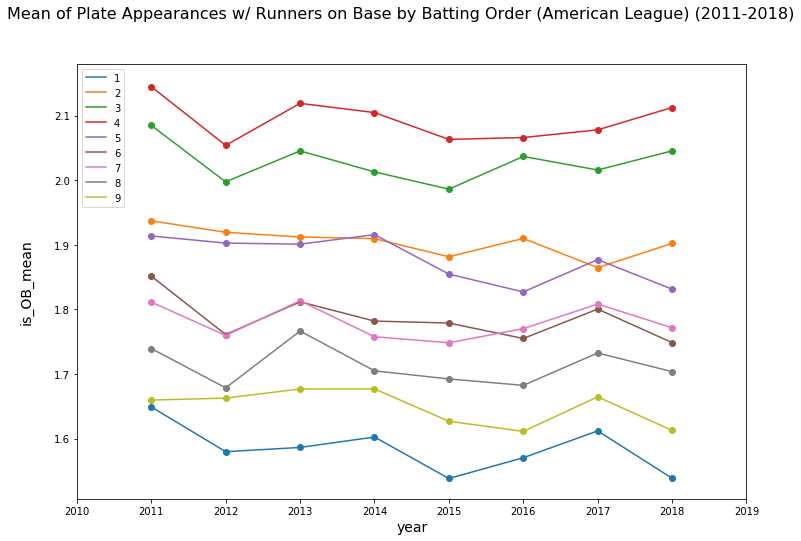

In [26]:
generate_trend(AL_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({AL})')

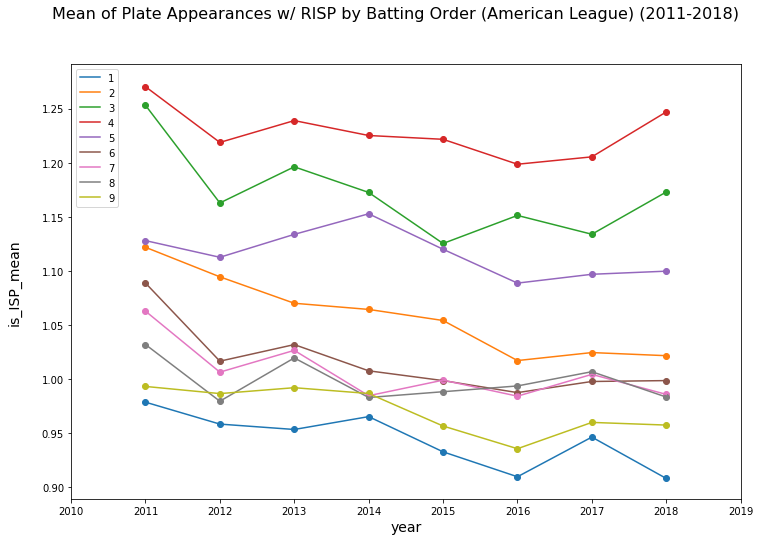

In [27]:
generate_trend(AL_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({AL})')

### Trend 2011-2018 (%) (AL Only)

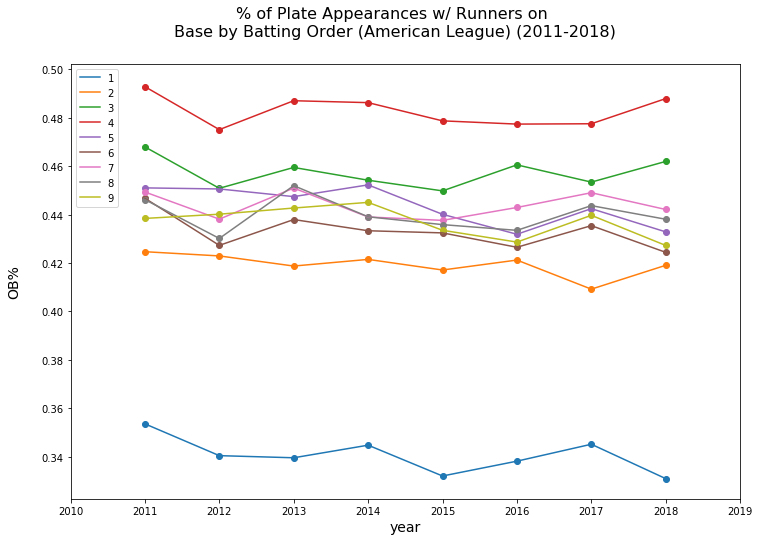

In [28]:
generate_trend(AL_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on \nBase by Batting Order ({AL})')

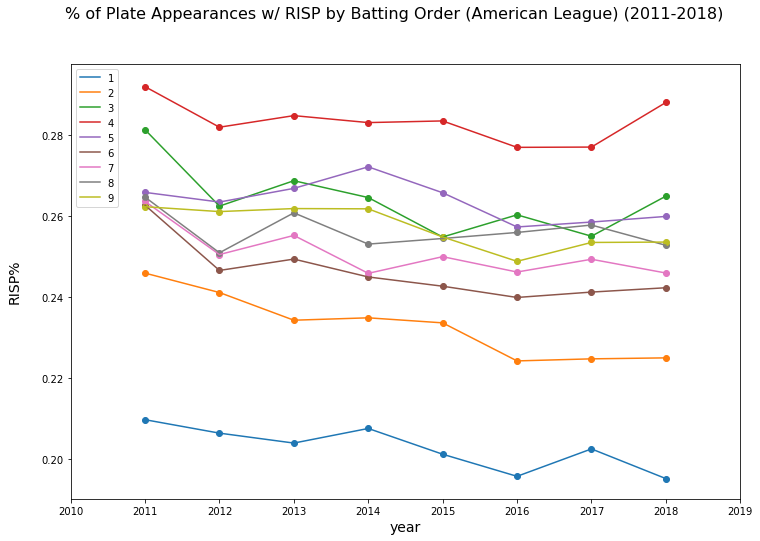

In [29]:
generate_trend(AL_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({AL})')

## Trend 2011-2018 (No.1 R/G)

In [30]:
rg_season_scraped_dict = {}
max_rg = list(val_11_18.groupby(by='Season')['R/G'].max().reset_index().values)
max_rg_dict = {int(x[0]): x[1] for x in max_rg}
for season in range(2011, 2019):
    max_rg = max_rg_dict[season]
    team = val_11_18[(val_11_18.Season == season) &
                     (val_11_18['R/G'] == max_rg)].Tm.values[0]
    season_df = scraped_11_18[(scraped_11_18.Season == season) &
                              (scraped_11_18.Team == team)]
    rg_season_scraped_dict[season] = season_df

In [31]:
for season in range(2011, 2019):
    print(f'{rg_season_scraped_dict[season].Season_Tm.values[0]}')

2011 BOS
2012 TEX
2013 BOS
2014 LAA
2015 TOR
2016 BOS
2017 HOU
2018 BOS


In [32]:
rg_season_dfs = {season: get_season_info(rg_season_scraped_dict, season, 'sum')
                         .drop(['OB%', 'RISP%'], axis=1)
                         .merge(get_season_info(rg_season_scraped_dict, 
                                             season, 'mean'), how='left')
                 for season in range(2011, 2019)}

In [33]:
RG = '#1 R/G Teams'

### Trend 2011-2018 (Mean) (No.1 R/G)

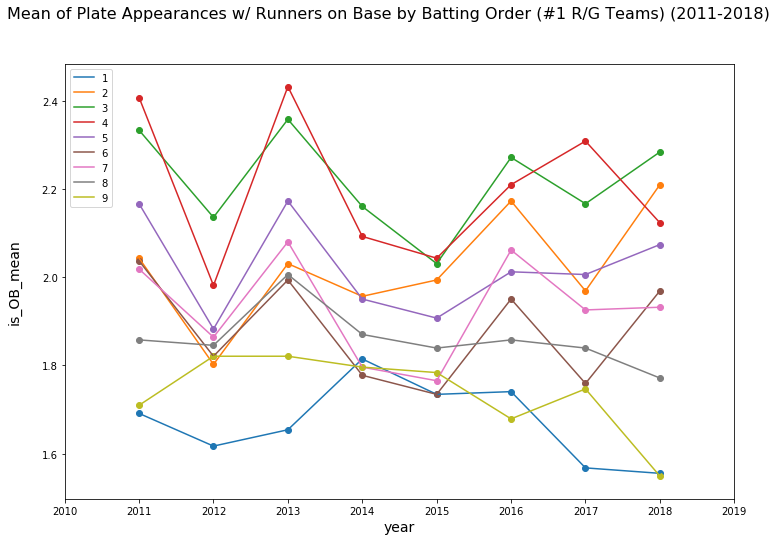

In [34]:
generate_trend(rg_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({RG})')

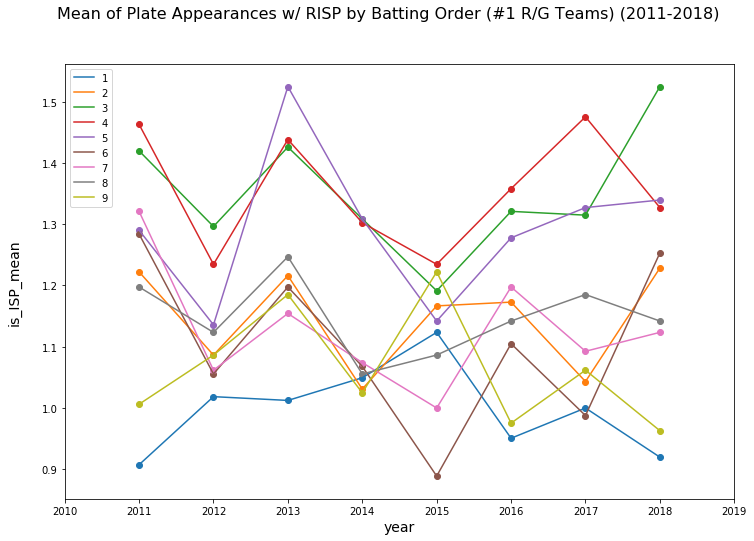

In [35]:
generate_trend(rg_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({RG})')

### Trend 2011-2018 (%) (No.1 R/G)

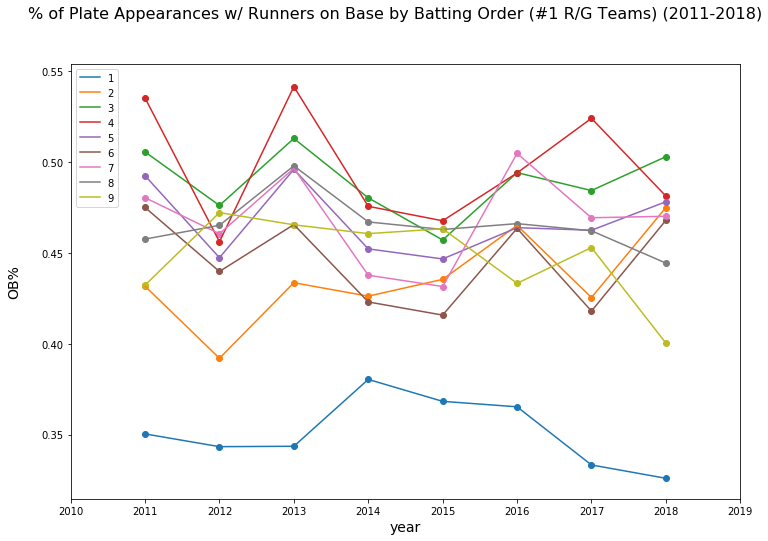

In [36]:
generate_trend(rg_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({RG})')

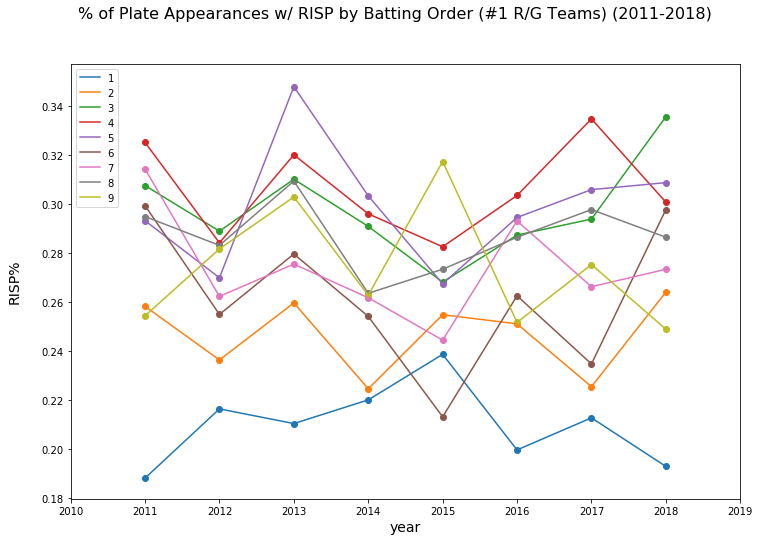

In [37]:
generate_trend(rg_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({RG})')

## Trend 2011-2018 (Top 5 R/G)

In [38]:
rg5_season_scraped_dict = {}
for season in range(2011, 2019):
    teams = list(season_val_dict[season].sort_values('R/G')\
                                        .tail(5)['Tm'].values)
    print(f'{season}: {teams}')
    season_df = pd.concat([scraped_11_18[(scraped_11_18.Season == season) &
                                         (scraped_11_18.Team == team)]
                           for team in teams])
    rg5_season_scraped_dict[season] = season_df

2011: ['STL', 'DET', 'TEX', 'NYY', 'BOS']
2012: ['STL', 'LAA', 'MIL', 'NYY', 'TEX']
2013: ['BAL', 'OAK', 'STL', 'DET', 'BOS']
2014: ['TOR', 'OAK', 'COL', 'DET', 'LAA']
2015: ['COL', 'BOS', 'TEX', 'NYY', 'TOR']
2016: ['STL', 'CLE', 'CHC', 'COL', 'BOS']
2017: ['WSN', 'CHC', 'COL', 'NYY', 'HOU']
2018: ['LAD', 'OAK', 'CLE', 'NYY', 'BOS']


In [39]:
rg5_season_dfs = {season: get_season_info(rg5_season_scraped_dict, 
                                          season, 'sum')
                          .drop(['OB%', 'RISP%'], axis=1)
                          .merge(get_season_info(rg5_season_scraped_dict, 
                                                  season, 'mean'), 
                                  how='left')
                  for season in range(2011, 2019)}

In [40]:
RG5 = 'Top 5 R/G Teams'

### Trend 2011-2018 (Mean) (Top 5 R/G)

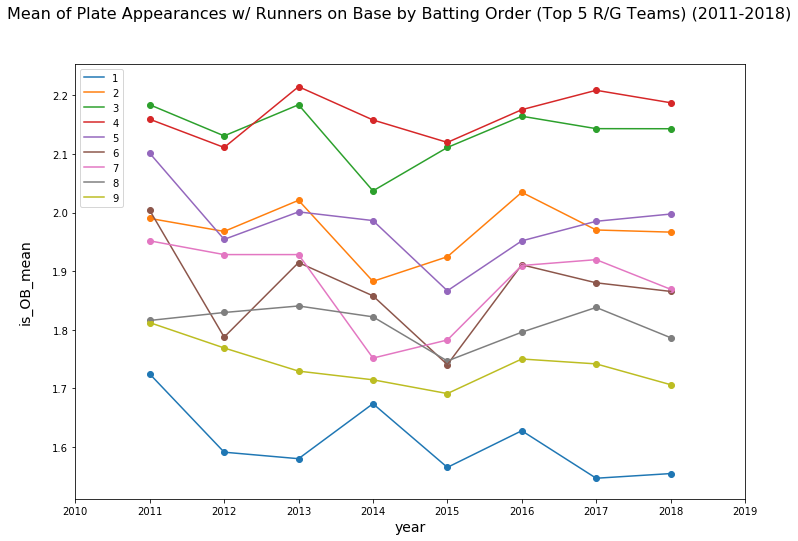

In [41]:
generate_trend(rg5_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({RG5})')

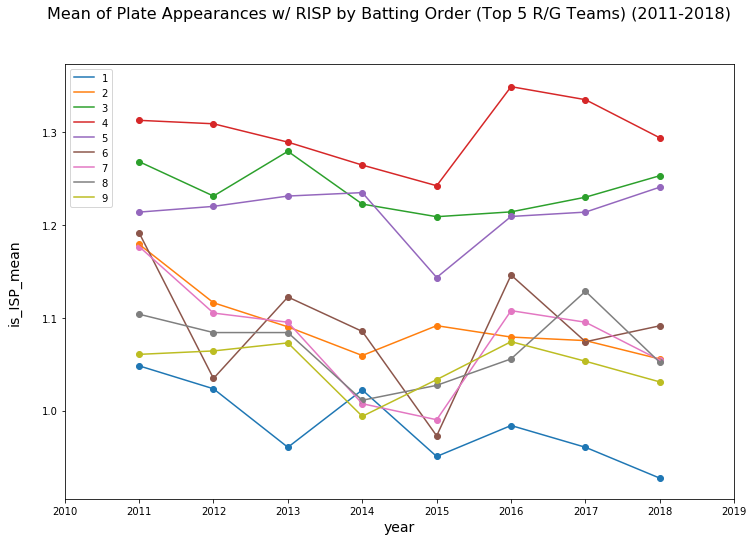

In [42]:
generate_trend(rg5_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({RG5})')

### Trend 2011-2018 (%) (Top 5 R/G)

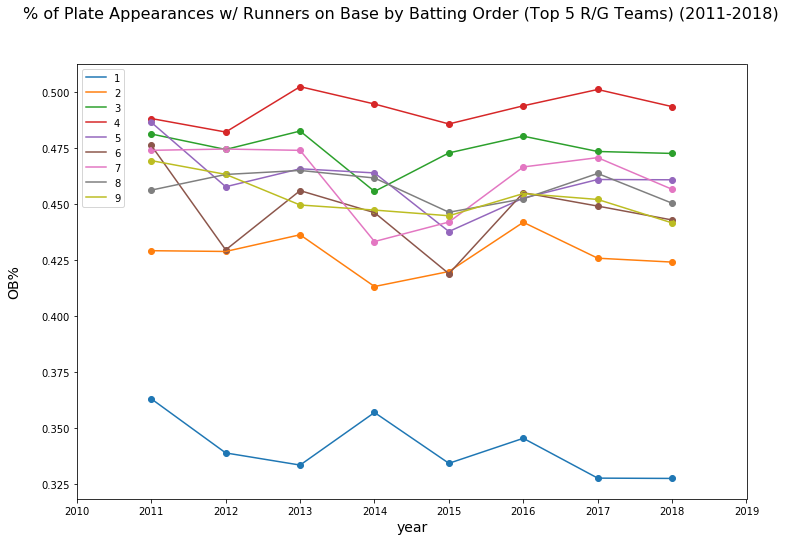

In [43]:
generate_trend(rg5_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({RG5})')

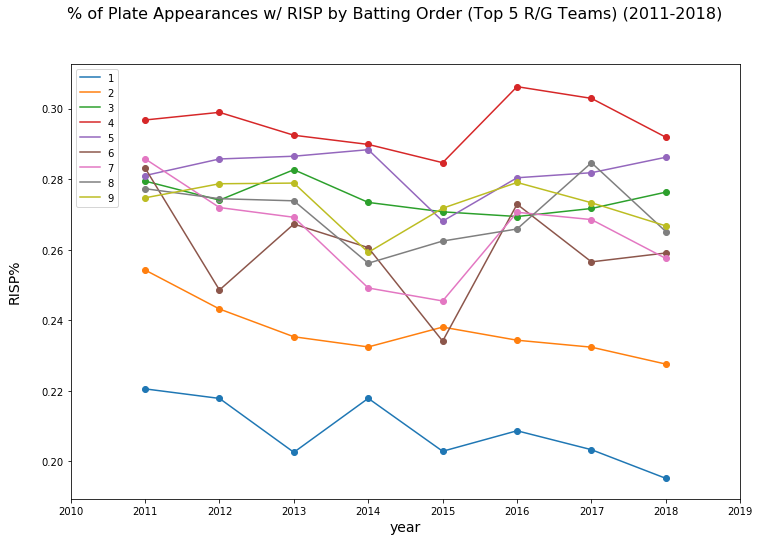

In [44]:
generate_trend(rg5_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({RG5})')

## Trend 2011-2018 (When Total PA over 38)

In [45]:
scraped_11_18.head()

,Batting_Order,PA,is_OB,is_ISP,Team,URL,GM,Season,Season_Tm
0,1,5,1,0,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
1,2,5,1,0,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
2,3,5,4,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
3,4,4,2,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
4,5,4,2,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR


In [46]:
o38_season_scraped_dict = {}
for season in range(2011, 2019):
    df = scraped_11_18[scraped_11_18.Season == season]
    teams = list(set(df.Team.values))
    temp_dfs = []
    for team in teams:
        team_df = df[df.Team == team].groupby(by='GM').PA.sum().reset_index()
        o38_gms = team_df[team_df.PA > 38].GM.values
        temp_dfs.append(df[(df.Team == team) & (df.GM.isin(o38_gms))])
    o38_season_scraped_dict[season] = pd.concat(temp_dfs)

In [47]:
o38_season_dfs = {season: get_season_info(o38_season_scraped_dict, 
                                          season, 'sum')
                          .drop(['OB%', 'RISP%'], axis=1)
                          .merge(get_season_info(o38_season_scraped_dict, 
                                                  season, 'mean'), 
                                 how='left')
                  for season in range(2011, 2019)}

In [48]:
o38 = '38+ PA Games'

### Trend 2011-2018 (Mean) (38+ PA Games)

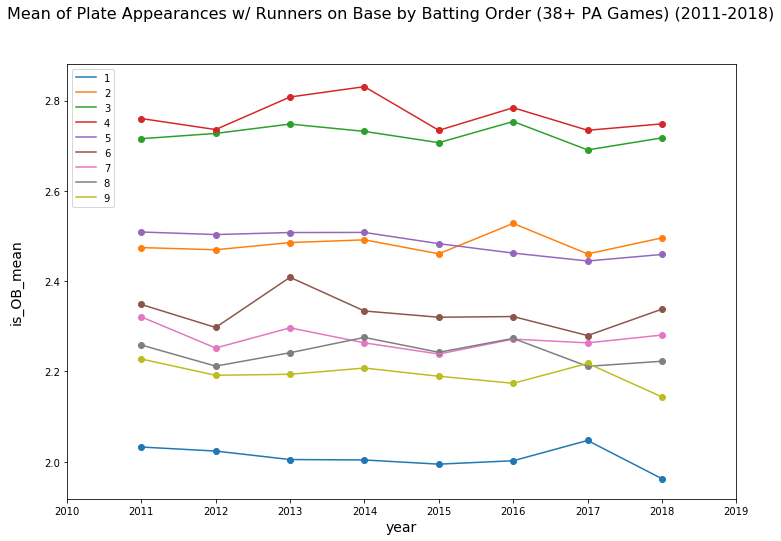

In [49]:
generate_trend(o38_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({o38})')

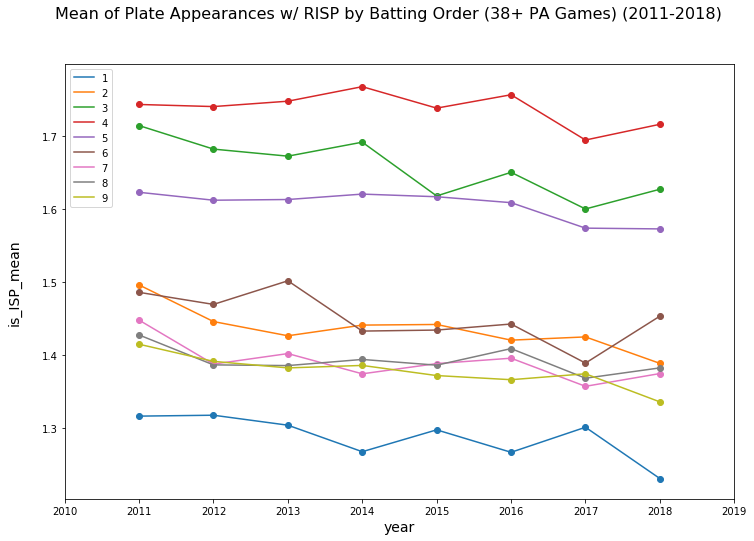

In [50]:
generate_trend(o38_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({o38})')

### Trend 2011-2018 (%) (38+ PA Games)

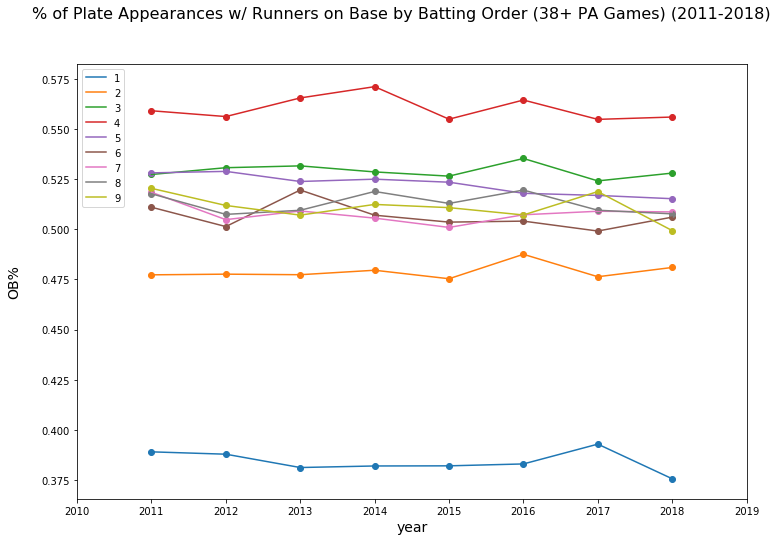

In [51]:
generate_trend(o38_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({o38})')

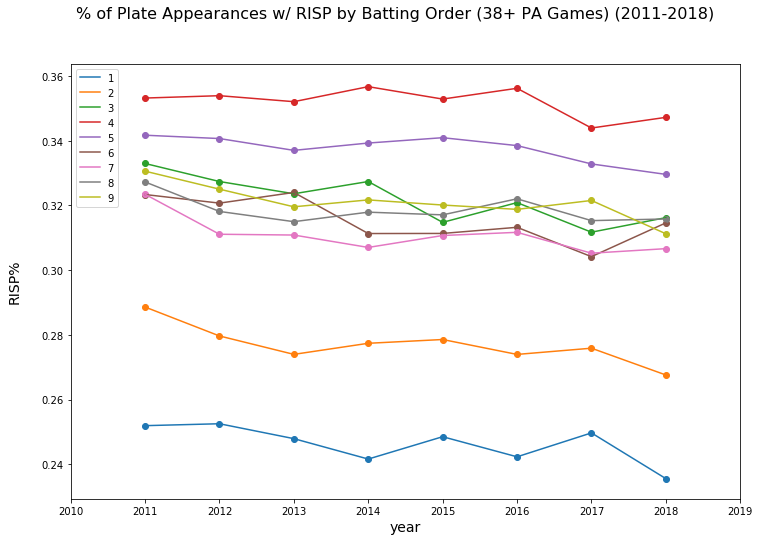

In [52]:
generate_trend(o38_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({o38})')

## HR Trend (2011-2018)

Text(0.5, 0.98, 'Home Run (2011-2018)\n')

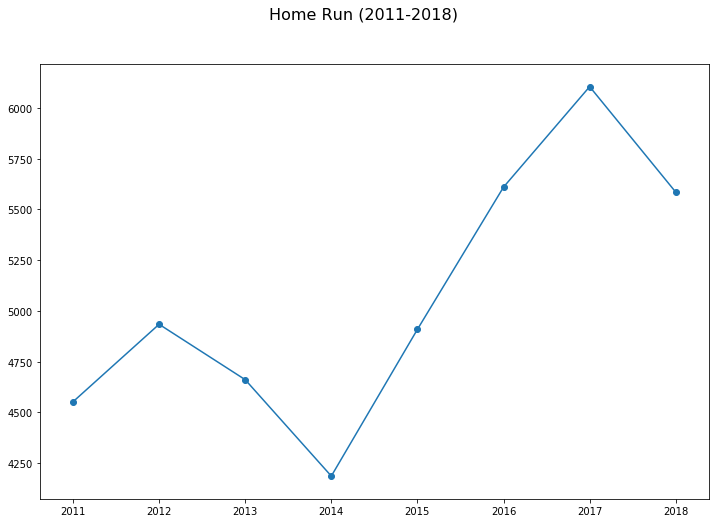

In [53]:
figsize(12, 8)
seasons = [i for i in range(2011, 2019)]
ys = val_11_18.groupby(by='Season').HR.sum().reset_index().HR.values
plt.plot(seasons, ys)
plt.scatter(seasons, ys)
plt.suptitle(f'Home Run (2011-2018)\n', fontsize=16)

## Individual Cases

### Angels

In [57]:
scraped_11_18[scraped_11_18.Season_Tm == '2018 LAA']\
.groupby('Batting_Order')[["PA", "is_OB", "is_ISP"]]\
.mean().reset_index()

,Batting_Order,PA,is_OB,is_ISP
0,1,4.598765,1.475309,0.808642
1,2,4.462963,1.691358,0.919753
2,3,4.376543,2.098765,1.160494
3,4,4.302469,2.166667,1.327160
4,5,4.209877,1.734568,0.993827
5,6,4.111111,1.672840,0.919753
6,7,4.018519,1.746914,0.938272
7,8,3.882716,1.722222,1.024691
8,9,3.740741,1.456790,0.851852


In [60]:
scraped_11_18[scraped_11_18.Season_Tm == '2018 LAA']\
.groupby('GM')[['PA']].sum().reset_index()\
.groupby('PA').count()

,GM
PA,
28,4
30,3
31,6
32,9
33,7
34,11
35,18
36,15
37,13


### Yankees

In [61]:
scraped_11_18[scraped_11_18.Season_Tm == '2018 NYY']\
.groupby('Batting_Order')[["PA", "is_OB", "is_ISP"]]\
.mean().reset_index()

,Batting_Order,PA,is_OB,is_ISP
0,1,4.722222,1.530864,0.895062
1,2,4.604938,1.956790,0.932099
2,3,4.518519,2.179012,1.296296
3,4,4.413580,2.129630,1.222222
4,5,4.333333,2.024691,1.185185
5,6,4.197531,1.851852,1.061728
6,7,4.104938,1.950617,1.049383
7,8,3.969136,1.790123,0.969136
8,9,3.845679,1.586420,1.030864


In [59]:
scraped_11_18[scraped_11_18.Season_Tm == '2018 NYY']\
.groupby('GM')[['PA']].sum().reset_index()\
.groupby('PA').count()

,GM
PA,
28,1
30,1
31,2
32,9
33,5
34,17
35,12
36,14
37,16
